In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the CSV files into dataframes
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge the datasets
# Step 1: Merge transactions with customers on CustomerID
transactions_customers = pd.merge(transactions, customers, on="CustomerID", how="left")

# Step 2: Merge the resulting dataframe with products on ProductID
final_data = pd.merge(transactions_customers, products, on="ProductID", how="inner")
final_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [22]:
final_data.drop(columns='Price_x', inplace=True)
final_data.rename(columns={"Price_y": "Product Price"}, inplace=True)

In [23]:
# Display summary statistics
print("\nSummary Statistics:")
final_data.describe(include=['float64', 'int64'])


Summary Statistics:


,Quantity,TotalValue,Product Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [24]:
# Check for missing values
print("\nMissing Values:")
print(final_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Product Price      0
dtype: int64


In [25]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(final_data.duplicated().sum())


Duplicate Rows:
0


In [26]:
final_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Product Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Text(0.5, 1.0, 'Top Selling Products')

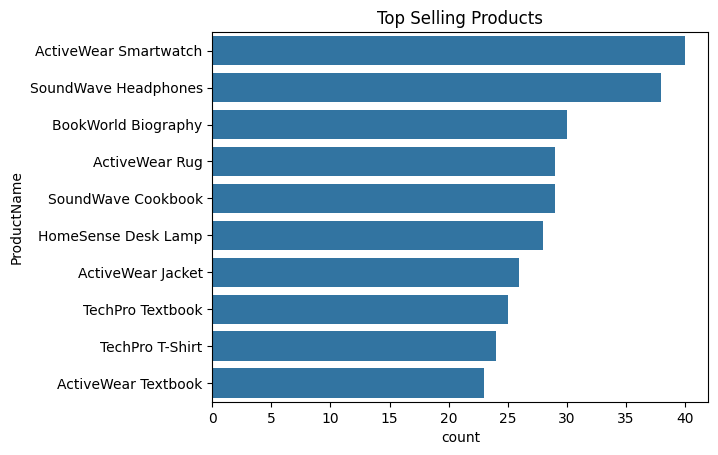

In [27]:
top_selling_products = final_data['ProductName'].value_counts().head(10).reset_index()
sns.barplot(data=top_selling_products, x='count', y='ProductName')
plt.title('Top Selling Products')

Text(0.5, 1.0, 'Total Sales by Region')

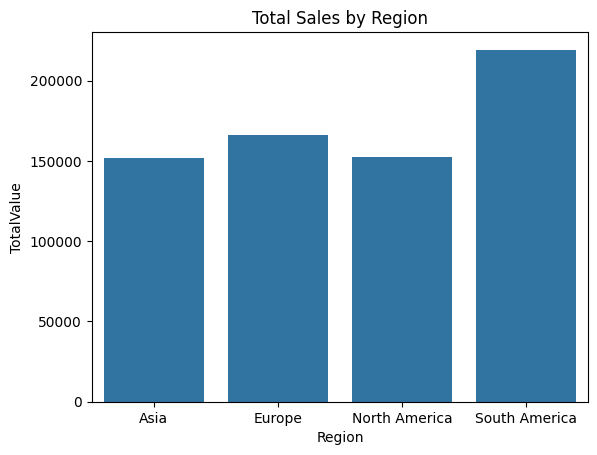

In [28]:
sales_by_region = final_data.groupby("Region")["TotalValue"].sum().reset_index()
sns.barplot(data=sales_by_region, x='Region', y='TotalValue')
plt.title("Total Sales by Region")

Highest Sale is recorded in South America which is around 220000$ for the whole year. Followed by Europe and Asia and North America being almost same at 150000$

Text(0.5, 1.0, 'Total Sales by Category')

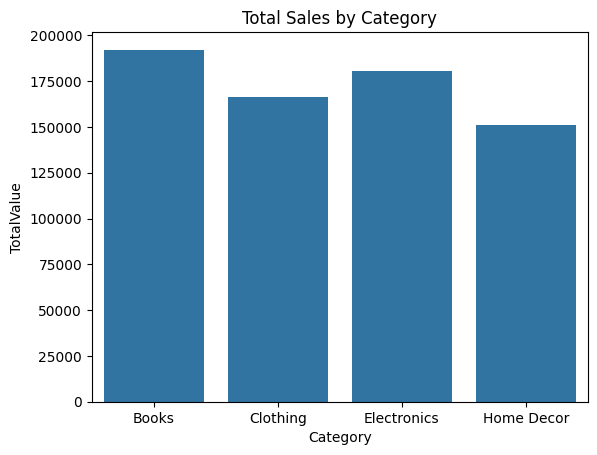

In [29]:
sales_by_category = final_data.groupby("Category")["TotalValue"].sum().reset_index()
sns.barplot(data=sales_by_category, x='Category', y='TotalValue')
plt.title("Total Sales by Category")

In [30]:
# Ensure TransactionDate is in datetime format
final_data["TransactionDate"] = pd.to_datetime(final_data["TransactionDate"], errors="coerce")

# Add new columns for day of the week, month, week number, hour, and quarter
final_data["DayOfWeek"] = final_data["TransactionDate"].dt.day_name()
final_data["Month"] = final_data["TransactionDate"].dt.month_name()
final_data["WeekNumber"] = final_data["TransactionDate"].dt.isocalendar().week
final_data["Hour"] = final_data["TransactionDate"].dt.hour
final_data["Quarter"] = final_data["TransactionDate"].dt.quarter

# Display the first few rows to confirm the new columns
print("\nUpdated Dataset with Time-Based Features:")
print(final_data[["TransactionDate", "DayOfWeek", "Month", "WeekNumber", "Hour", "Quarter"]].head())


Updated Dataset with Time-Based Features:
      TransactionDate DayOfWeek   Month  WeekNumber  Hour  Quarter
0 2024-08-25 12:38:23    Sunday  August          34    12        3
1 2024-05-27 22:23:54    Monday     May          22    22        2
2 2024-04-25 07:38:55  Thursday   April          17     7        2
3 2024-03-26 22:55:37   Tuesday   March          13    22        1
4 2024-03-21 15:10:10  Thursday   March          12    15        1


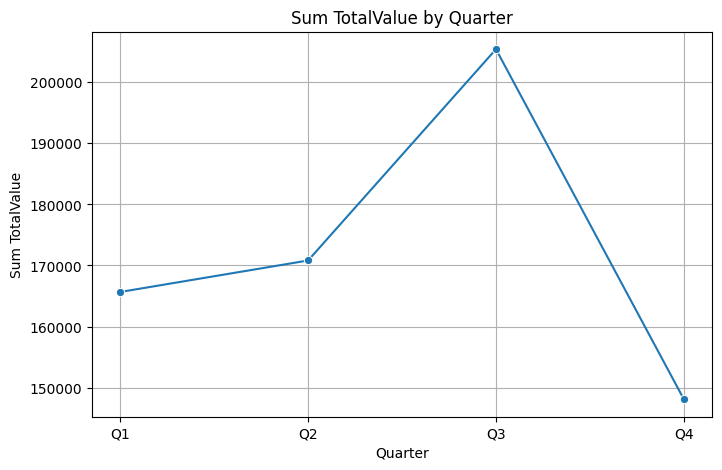

In [31]:
# Quarter-wise sum of  TotalValue
quarterwise_avg = final_data.groupby("Quarter")["TotalValue"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=quarterwise_avg, x="Quarter", y="TotalValue", marker="o")
plt.title("Sum TotalValue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Sum TotalValue")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Q1", "Q2", "Q3", "Q4"])
plt.grid(True)
plt.show()

 Insight: The business experiences significant seasonal fluctuations in sales, with a pronounced peak in Q3 followed by a sharp decline in Q4.

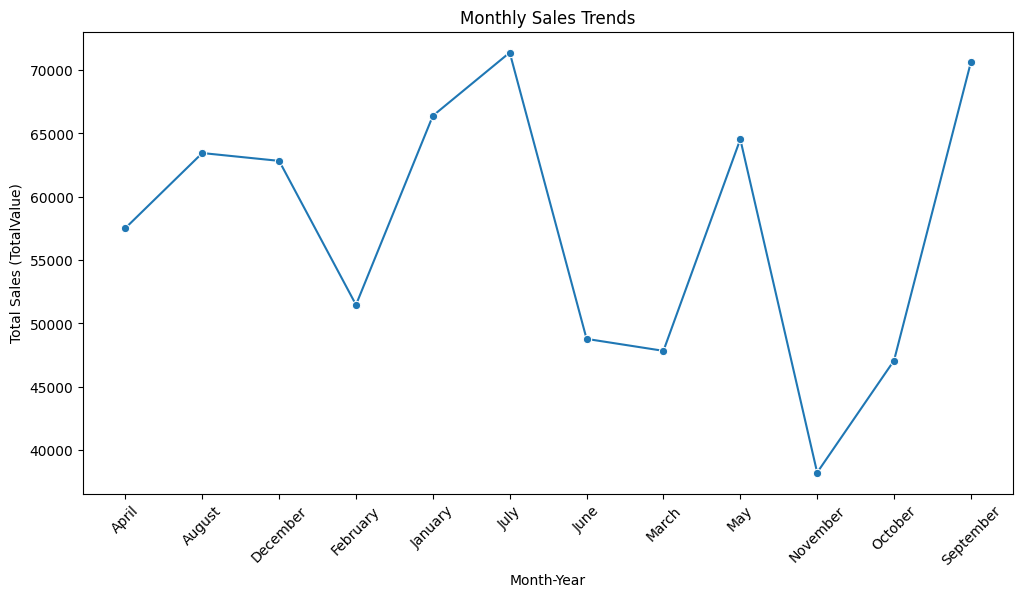

In [33]:
# Monthly Sales Trends
monthly_sales = final_data.groupby([ 'Month'])['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (TotalValue)')
plt.xticks(rotation=45)
plt.show()

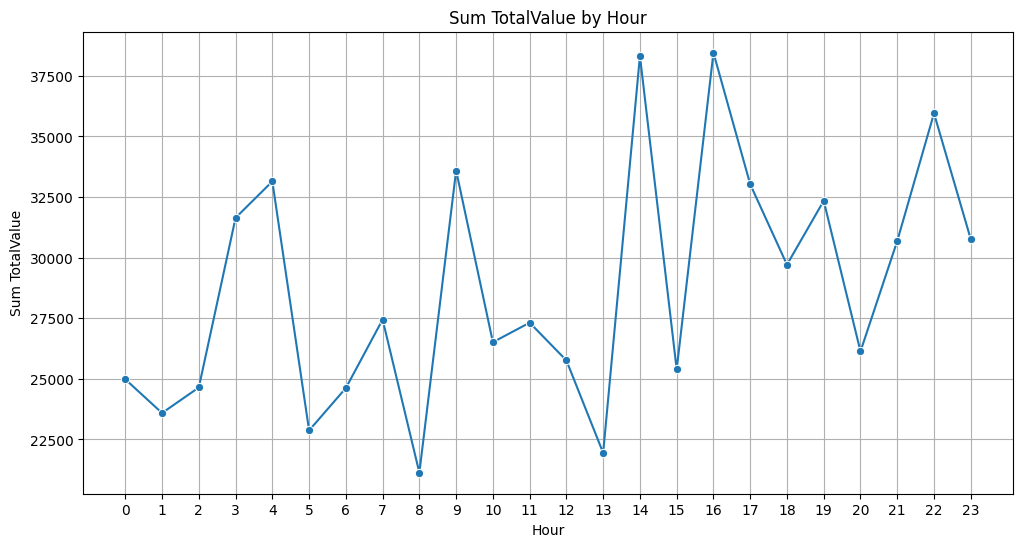

In [40]:
# Hour-wise sum of TotalValue
hourwise_avg = final_data.groupby("Hour")["TotalValue"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourwise_avg, x="Hour", y="TotalValue", marker="o")
plt.title("Sum TotalValue by Hour")
plt.xlabel("Hour")
plt.ylabel("Sum TotalValue")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [41]:
# Define the order of days for chronological ordering
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert DayOfWeek to a categorical variable with the specified order
final_data["DayOfWeek"] = pd.Categorical(final_data["DayOfWeek"], categories=days_order, ordered=True)

C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_42468\2337128495.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourwise_avg = final_data.groupby("DayOfWeek")["TotalValue"].sum().reset_index()


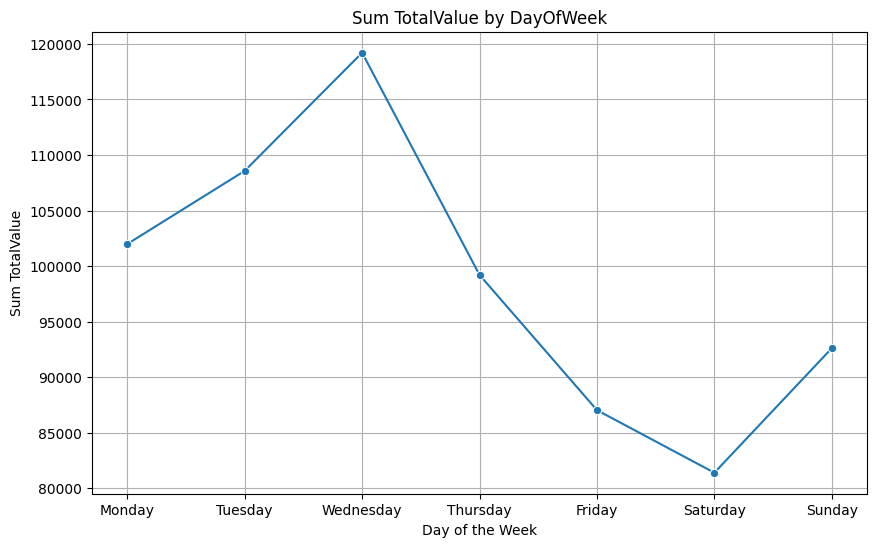

In [42]:
# Day of the Week-wise sum of TotalValue
hourwise_avg = final_data.groupby("DayOfWeek")["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourwise_avg, x="DayOfWeek", y="TotalValue", marker="o")
plt.title("Sum TotalValue by DayOfWeek")
plt.xlabel("Day of the Week")
plt.ylabel("Sum TotalValue")
plt.grid(True)
plt.show()

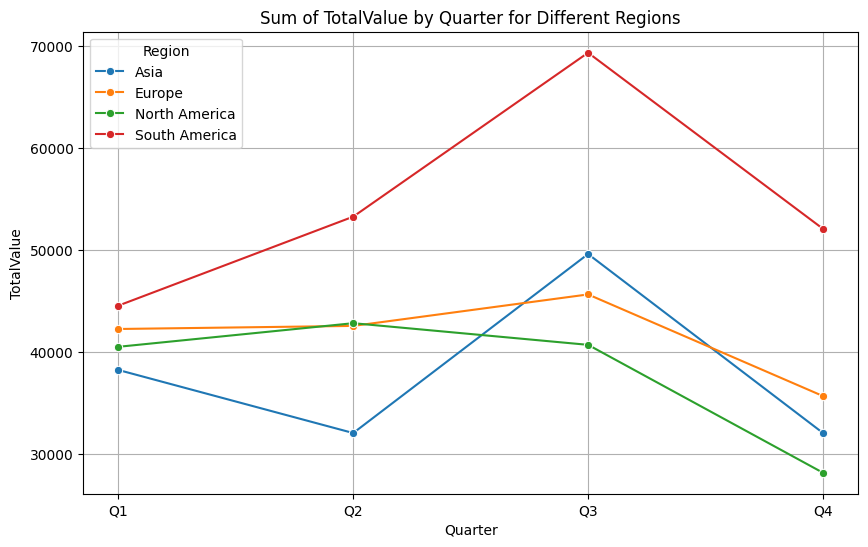

In [43]:
# Sum of TotalValue across Quarters for Regions
quarterly_region = final_data.groupby(["Quarter", "Region"])["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_region, x="Quarter", y="TotalValue", hue="Region", marker="o")
plt.title("Sum of TotalValue by Quarter for Different Regions")
plt.xlabel("Quarter")
plt.ylabel("TotalValue")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Q1", "Q2", "Q3", "Q4"])
plt.grid(True)
plt.legend(title="Region")
plt.show()

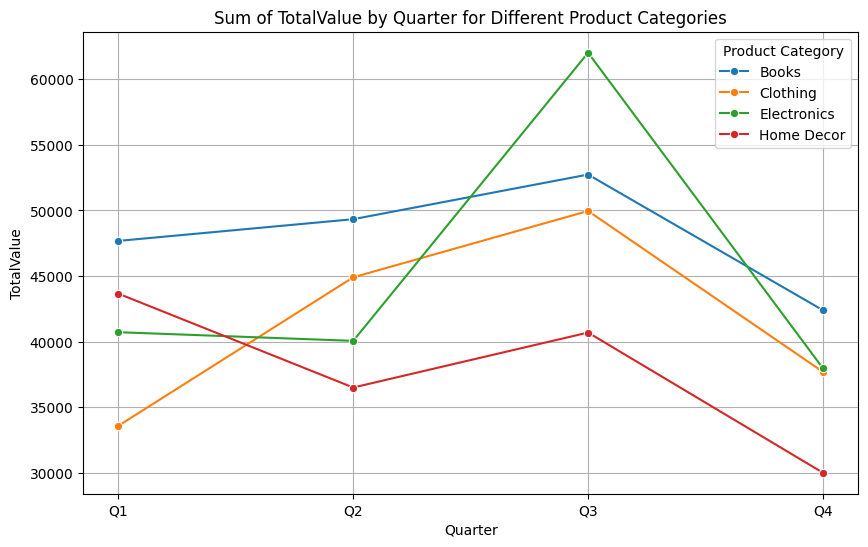

In [44]:
# Sum of TotalValue across Quarters for Product Categories
quarterly_category = final_data.groupby(["Quarter", "Category"])["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_category, x="Quarter", y="TotalValue", hue="Category", marker="o")
plt.title("Sum of TotalValue by Quarter for Different Product Categories")
plt.xlabel("Quarter")
plt.ylabel("TotalValue")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Q1", "Q2", "Q3", "Q4"])
plt.grid(True)
plt.legend(title="Product Category")
plt.show()

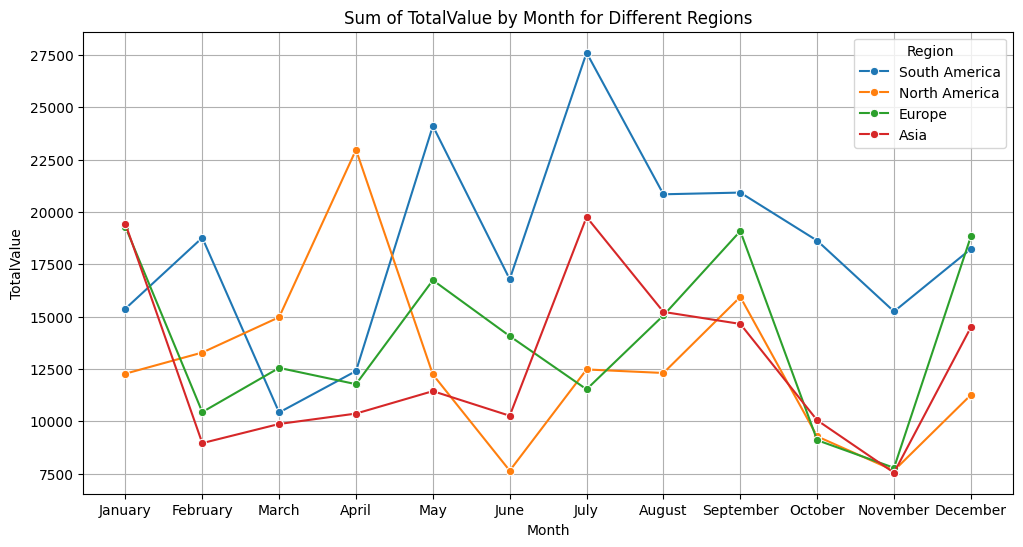

In [51]:
# Sum of TotalValue Monthly for Regions
hourly_region = final_data.groupby(["Month", "Region"])["TotalValue"].sum().reset_index()
# Ensure 'Month' is ordered correctly from January to December
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hourly_region["Month"] = pd.Categorical(hourly_region["Month"], categories=month_order, ordered=True)

# Sort the data by the ordered 'Month'
hourly_region = hourly_region.sort_values("Month")

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_region, x="Month", y="TotalValue", hue="Region", marker="o")
plt.title("Sum of TotalValue by Month for Different Regions")
plt.xlabel("Month")
plt.ylabel("TotalValue")
plt.grid(True)
plt.legend(title="Region")
plt.show()

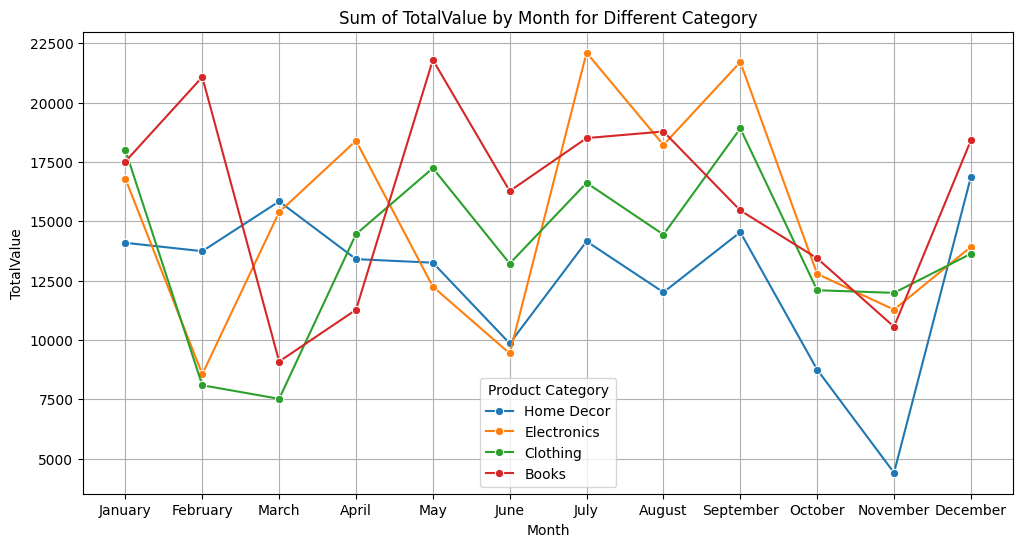

In [16]:
# Sum of TotalValue Monthly for Product Categories
hourly_category = final_data.groupby(["Month", "Category"])["TotalValue"].sum().reset_index()
# Ensure 'Month' is ordered correctly from January to December
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hourly_category["Month"] = pd.Categorical(hourly_category["Month"], categories=month_order, ordered=True)

# Sort the data by the ordered 'Month'
hourly_category = hourly_category.sort_values("Month")

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_category, x="Month", y="TotalValue", hue="Category", marker="o")
plt.title("Sum of TotalValue by Month for Different Category")
plt.xlabel("Month")
plt.ylabel("TotalValue")
plt.grid(True)
plt.legend(title="Product Category")
plt.show()

C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_48108\3614138455.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_region = final_data.groupby(["DayOfWeek", "Region"])["TotalValue"].sum().reset_index()


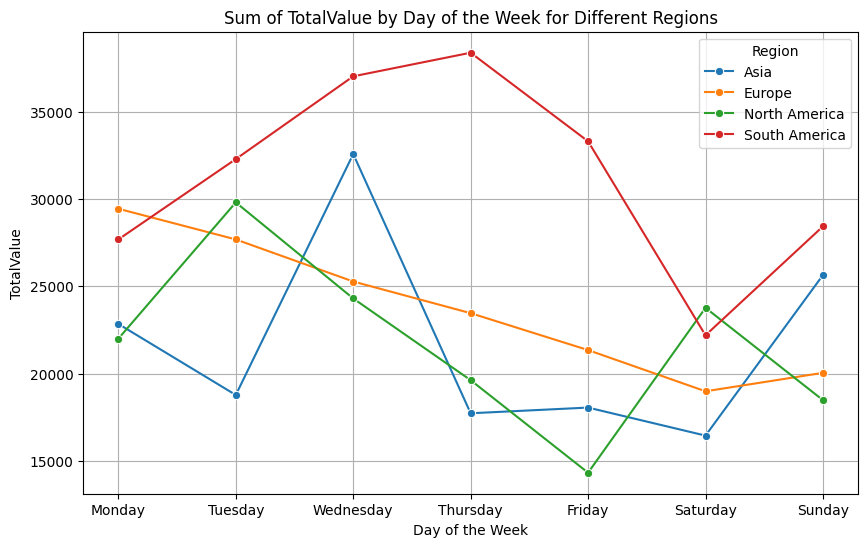

In [26]:
# Sum of TotalValue Daily for Regions
daily_region = final_data.groupby(["DayOfWeek", "Region"])["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_region, x="DayOfWeek", y="TotalValue", hue="Region", marker="o")
plt.title("Sum of TotalValue by Day of the Week for Different Regions")
plt.xlabel("Day of the Week")
plt.ylabel("TotalValue")
plt.grid(True)
plt.legend(title="Region")
plt.show()

C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_48108\2301220166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_category = final_data.groupby(["DayOfWeek", "Category"])["TotalValue"].sum().reset_index()


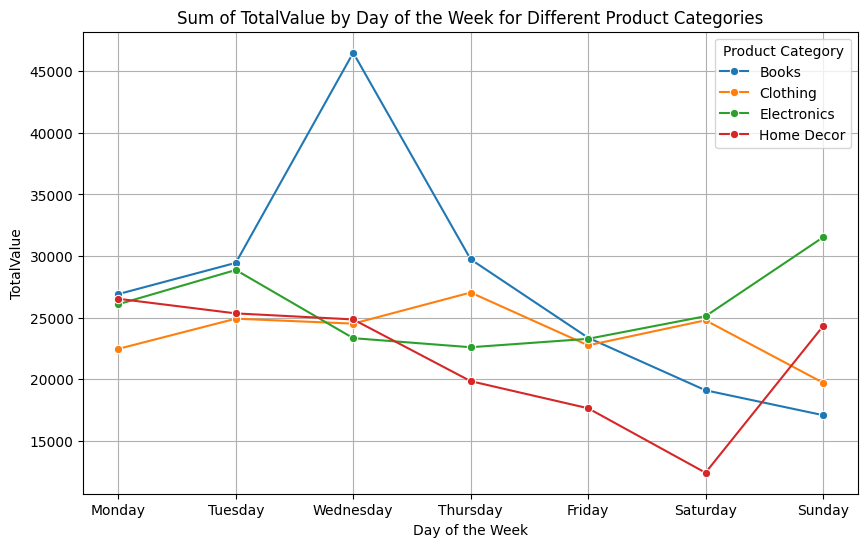

In [27]:
# Sum of TotalValue Daily for Product Categories
daily_category = final_data.groupby(["DayOfWeek", "Category"])["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_category, x="DayOfWeek", y="TotalValue", hue="Category", marker="o")
plt.title("Sum of TotalValue by Day of the Week for Different Product Categories")
plt.xlabel("Day of the Week")
plt.ylabel("TotalValue")
plt.grid(True)
plt.legend(title="Product Category")
plt.show()

## Customer Analysis

In [49]:
final_data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'CustomerName', 'Region', 'SignupDate',
       'ProductName', 'Category', 'Product Price', 'DayOfWeek', 'Month',
       'WeekNumber', 'Hour', 'Quarter', 'Week'],
      dtype='object')

In [48]:
joined_data = final_data

# Convert TransactionDate to datetime format
joined_data['TransactionDate'] = pd.to_datetime(joined_data['TransactionDate'])

# Extract relevant time-based features
joined_data['DayOfWeek'] = joined_data['TransactionDate'].dt.day_name()
joined_data['Month'] = joined_data['TransactionDate'].dt.month
joined_data['Week'] = joined_data['TransactionDate'].dt.isocalendar().week
joined_data['Hour'] = joined_data['TransactionDate'].dt.hour
joined_data['Quarter'] = joined_data['TransactionDate'].dt.quarter

In [50]:
# 1. Customer Behavior Analysis (RFM Analysis)
# Recency: Days since the last purchase for each customer
latest_date = joined_data['TransactionDate'].max()
rfm = joined_data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,  # Recency
    'TransactionID': 'count',  # Frequency
    'TotalValue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Categorize customers based on RFM scores
rfm['RFM_Segment'] = pd.qcut(rfm['Monetary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("RFM Analysis:")
rfm.head()

RFM Analysis:


,CustomerID,Recency,Frequency,Monetary,RFM_Segment
0,C0001,55,5,3354.52,High
1,C0002,25,4,1862.74,Low
2,C0003,125,4,2725.38,Medium
3,C0004,4,8,5354.88,Very High
4,C0005,54,3,2034.24,Low


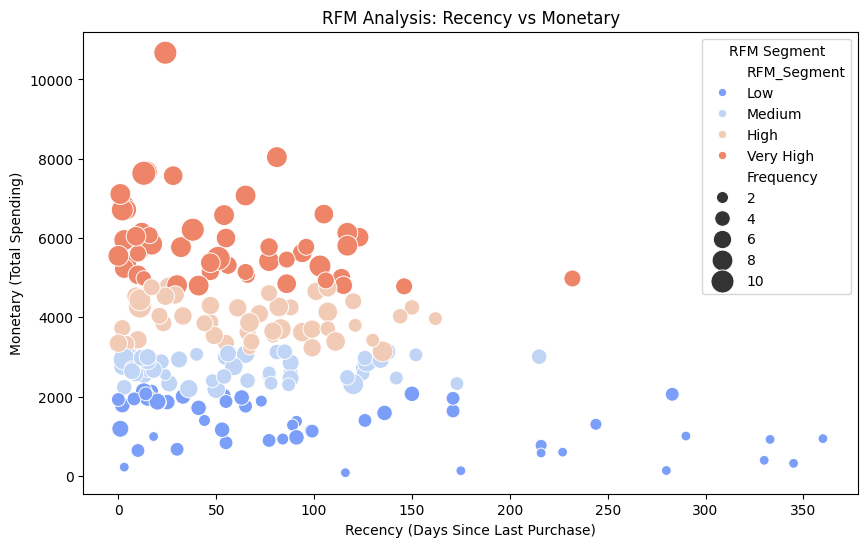

In [51]:
# Visualize RFM Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', size='Frequency', hue='RFM_Segment', palette='coolwarm', sizes=(50, 300))
plt.title('RFM Analysis: Recency vs Monetary')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary (Total Spending)')
plt.legend(title='RFM Segment')
plt.show()

In [53]:
# Heatmap of Hourly Sales by Day of Week
heatmap_data = joined_data.groupby(['DayOfWeek', 'Hour'])['TotalValue'].sum().unstack()

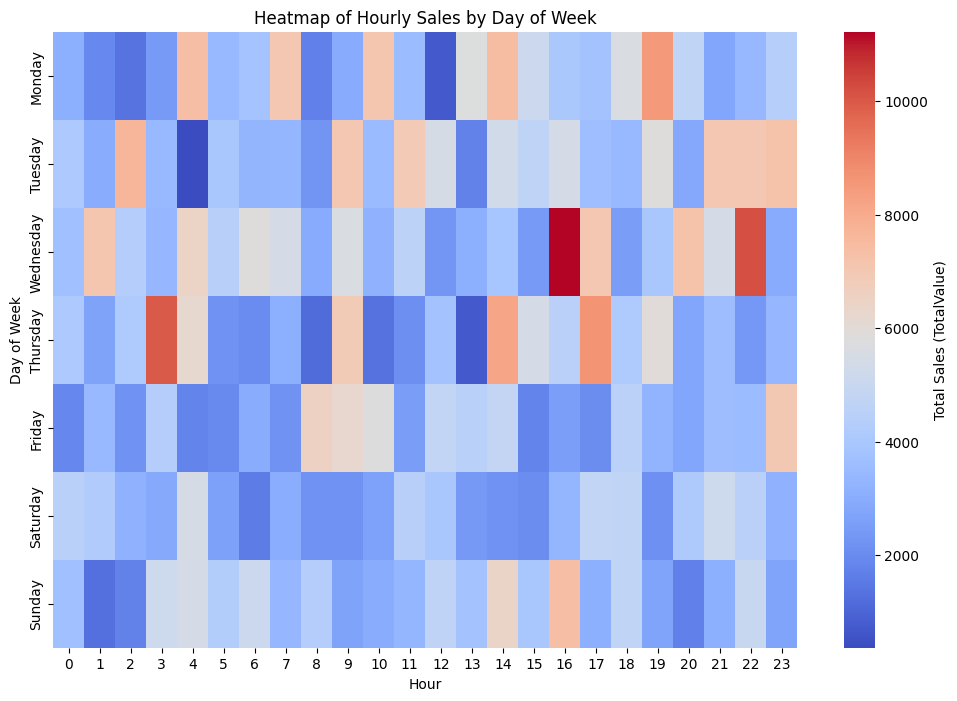

In [58]:
# Ensure chronological order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Total Sales (TotalValue)'})
plt.title('Heatmap of Hourly Sales by Day of Week')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

In [64]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   CustomerName     1000 non-null   object        
 7   Region           1000 non-null   object        
 8   SignupDate       1000 non-null   object        
 9   ProductName      1000 non-null   object        
 10  Category         1000 non-null   object        
 11  Product Price    1000 non-null   float64       
 12  DayOfWeek        1000 non-null   object        
 13  Month            1000 non-null   int32         
 14  WeekNumber       1000 non-null   UInt32  

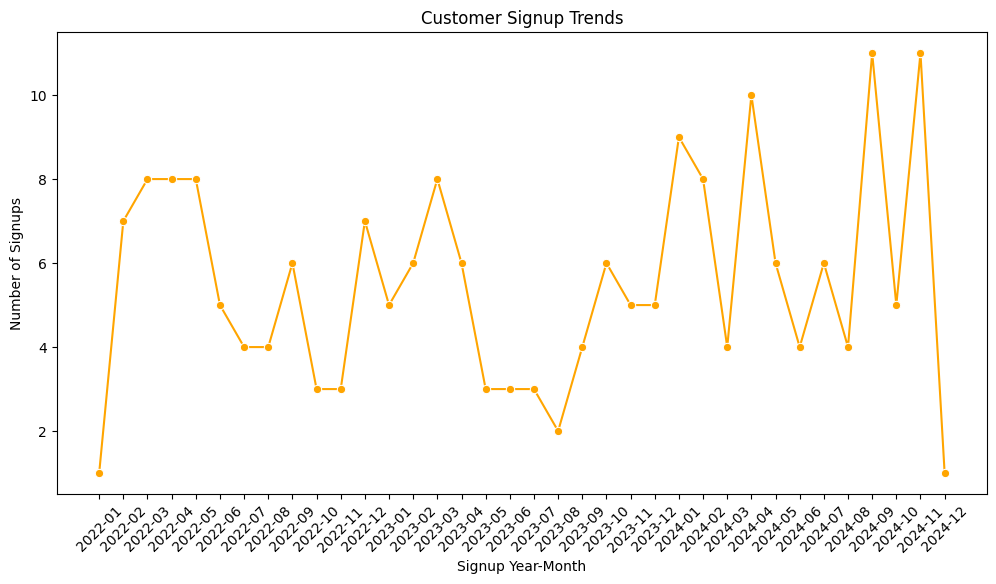

In [66]:
# Ensure SignupDate is converted to datetime format
if not pd.api.types.is_datetime64_any_dtype(joined_data['SignupDate']):
    joined_data['SignupDate'] = pd.to_datetime(joined_data['SignupDate'], errors='coerce')

# Cohort Analysis: Group by signup year and month
joined_data['SignupYearMonth'] = joined_data['SignupDate'].dt.to_period('M')
signup_trends = joined_data.groupby('SignupYearMonth')['CustomerID'].nunique().reset_index()
signup_trends.columns = ['SignupYearMonth', 'CustomerCount']

# Convert SignupYearMonth to string for plotting
signup_trends['SignupYearMonth'] = signup_trends['SignupYearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trends, x='SignupYearMonth', y='CustomerCount', marker='o', color='orange')
plt.title('Customer Signup Trends')
plt.xlabel('Signup Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

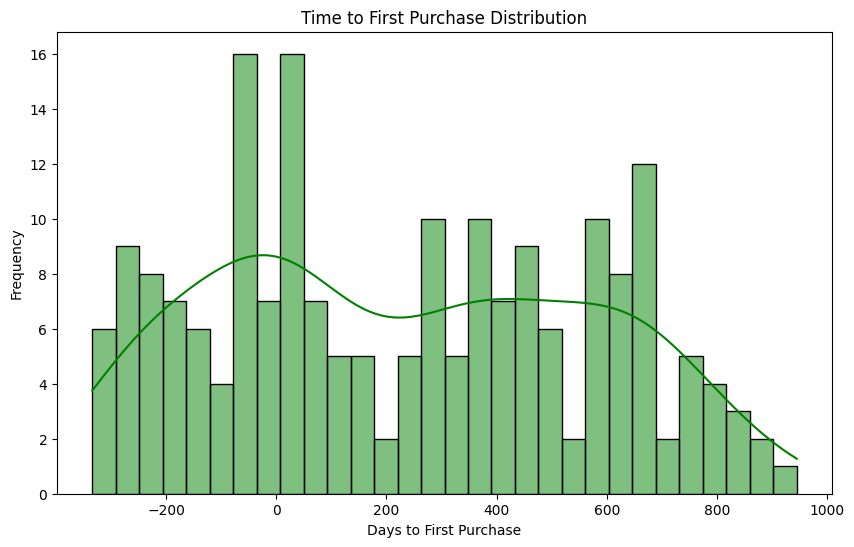

In [67]:
# Time to First Purchase
first_purchase = joined_data.groupby('CustomerID').agg({
    'SignupDate': 'min',
    'TransactionDate': 'min'
}).reset_index()
first_purchase['TimeToFirstPurchase'] = (first_purchase['TransactionDate'] - first_purchase['SignupDate']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data=first_purchase, x='TimeToFirstPurchase', kde=True, bins=30, color='green')
plt.title('Time to First Purchase Distribution')
plt.xlabel('Days to First Purchase')
plt.ylabel('Frequency')
plt.show()

In [70]:
num_negative_purchases = len(first_purchase[first_purchase['TimeToFirstPurchase'] < 0])
print(f"Number of customers with negative TimeToFirstPurchase: {num_negative_purchases}")

Number of customers with negative TimeToFirstPurchase: 62


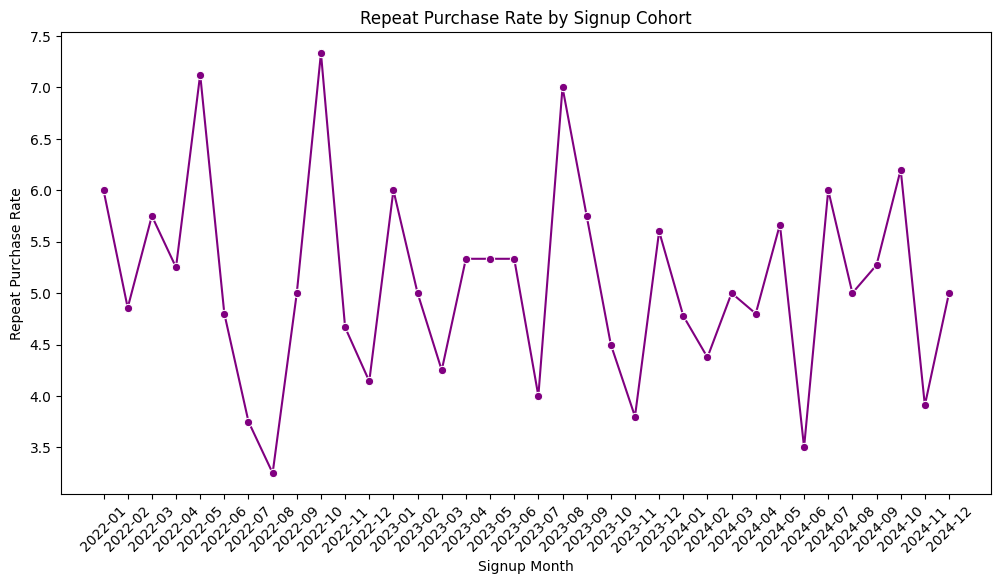

In [69]:
# Retention Analysis: Repeat purchase rate by signup cohort
joined_data['SignupMonth'] = joined_data['SignupDate'].dt.to_period('M')
repeat_purchase_rate = joined_data.groupby('SignupMonth').agg({
    'TransactionID': 'count',
    'CustomerID': 'nunique'
}).reset_index()
repeat_purchase_rate['RepeatRate'] = repeat_purchase_rate['TransactionID'] / repeat_purchase_rate['CustomerID']

# Convert SignupYearMonth to string for plotting
repeat_purchase_rate['SignupMonth'] = repeat_purchase_rate['SignupMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=repeat_purchase_rate, x='SignupMonth', y='RepeatRate', marker='o', color='purple')
plt.title('Repeat Purchase Rate by Signup Cohort')
plt.xlabel('Signup Month')
plt.ylabel('Repeat Purchase Rate')
plt.xticks(rotation=45)
plt.show()